In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
from scipy.stats import skew
import seaborn as sns
import os
import warnings
import os
print(os.listdir("../input"))

import warnings
warnings.filterwarnings('ignore')

['Metadata.txt', 'Data.csv']


In [ ]:
metadata = pd.read_csv('../input/Metadata.txt', sep='\t')

In [ ]:
metadata

,Notes for Tennis Data
0,"All data is in csv format, ready for use withi..."
1,Key to results data:
2,ATP = Tournament number (men)
3,WTA = Tournament number (women)
4,Location = Venue of tournament
5,Tournament = Name of tounament (including spon...
6,Data = Date of match (note: prior to 2003 the ...
7,Series = Name of ATP tennis series (Grand Slam...
8,Tier = Tier (tournament ranking) of WTA tennis...
9,Court = Type of court (outdoors or indoors)


In [ ]:
data = pd.read_csv('../input/Data.csv', encoding = 'ISO-8859-1')

In [ ]:
data.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,CBW,CBL,GBW,GBL,IWW,IWL,SBW,SBL,B365W,B365L,B&WW,B&WL,EXW,EXL,PSW,PSL,WPts,LPts,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63,77,6.0,4.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Enqvist T.,Clement A.,5,56,6.0,3.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,40,655,6.0,7.0,7.0,5.0,6.0,3.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Federer R.,Knippschild J.,65,87,6.0,1.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,81,198,7.0,6.0,5.0,7.0,6.0,4.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.Series.unique()

array(['International', 'Grand Slam', 'International Gold', 'Masters',
       'Masters Cup', 'International Series', 'ATP250', 'ATP500',
       'Masters 1000'], dtype=object)

# Evolution rank of Federer, Nadal and Djokovic

In [ ]:
top3 = data[(data.Winner.isin(['Federer R.', 'Nadal R.', 'Djokovic N.'])) | (data.Loser.isin(['Federer R.', 'Nadal R.', 'Djokovic N.']))]
top3 = top3[['Date', 'Winner', 'Loser', 'WRank', 'LRank']]

In [ ]:
top3_w = top3[top3.Winner.isin(['Federer R.', 'Nadal R.', 'Djokovic N.'])]
top3_l = top3[top3.Loser.isin(['Federer R.', 'Nadal R.', 'Djokovic N.'])]

top3_w = top3_w[['Date', 'Winner', 'WRank']]
top3_l = top3_l[['Date', 'Loser', 'LRank']]

In [ ]:
top3_w.columns = ['Date','Player','Rank']
top3_l.columns = ['Date','Player', 'Rank']

In [ ]:
top3 = pd.concat([top3_w, top3_l], sort=False)
top3['Date'] = pd.to_datetime(top3.Date, format='%d/%m/%Y')
top3 = top3.sort_values(['Date'])

In [ ]:
top3.Rank = top3.Rank.astype(int)

# Remove outline Ranks
top3 = top3[top3.Rank < 100]

In [ ]:
federer = top3[top3.Player == 'Federer R.']
nadal = top3[top3.Player == 'Nadal R.']
djokovic = top3[top3.Player == 'Djokovic N.']

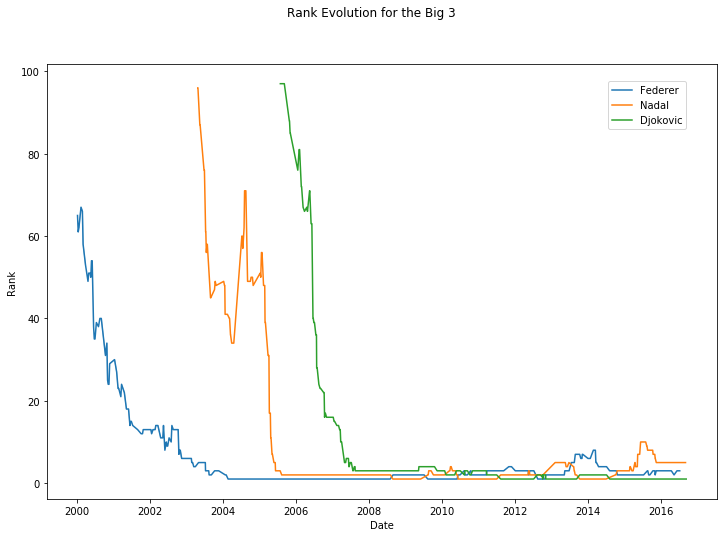

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.lineplot(x='Date', y='Rank', data=federer)
sns.lineplot(x='Date', y='Rank', data=nadal)
sns.lineplot(x='Date', y='Rank', data=djokovic)
fig.legend(bbox_to_anchor=(-0.2, 0.8, 1., 0), labels=['Federer','Nadal','Djokovic'])
t=fig.suptitle('Rank Evolution for the Big 3')

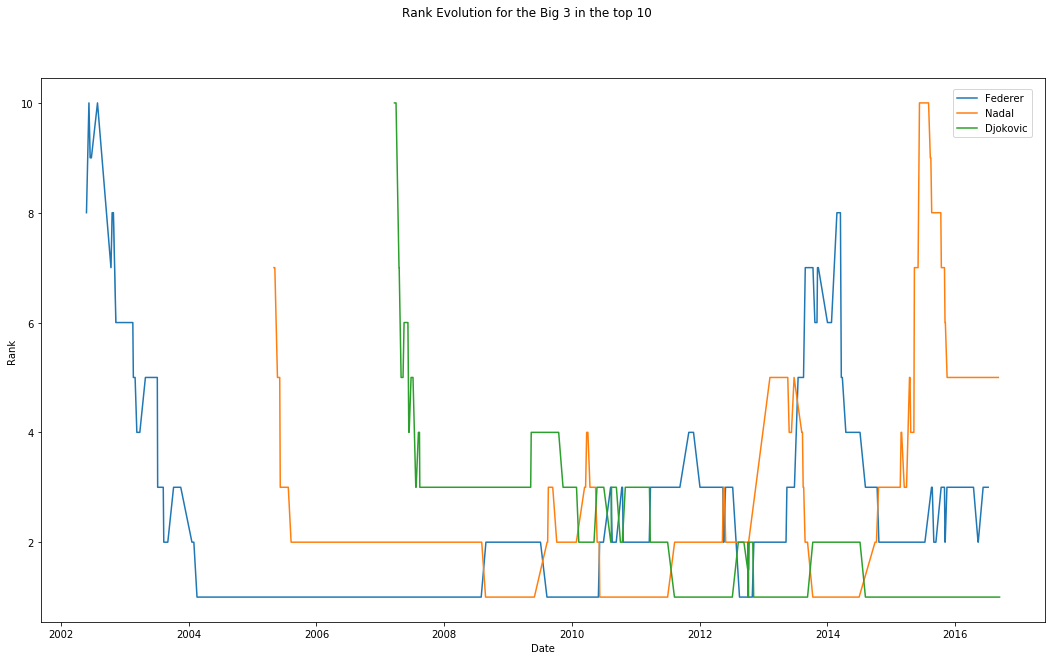

In [ ]:
fig = plt.figure(figsize=(18,10))
sns.lineplot(x='Date', y='Rank', data=federer[federer.Rank <=10])
sns.lineplot(x='Date', y='Rank', data=nadal[nadal.Rank <=10])
sns.lineplot(x='Date', y='Rank', data=djokovic[djokovic.Rank <=10])
fig.legend(bbox_to_anchor=(-0.2, 0.8, 1., 0), labels=['Federer','Nadal','Djokovic'])
t=fig.suptitle('Rank Evolution for the Big 3 in the top 10')

In [ ]:
slams = data[['Date','Tournament','Series', 'Round', 'Winner']]

In [ ]:
slams = slams[(slams.Series == 'Grand Slam') & (slams.Round == 'The Final')]

In [ ]:
slams = slams[slams.Winner.isin(['Federer R.', 'Nadal R.', 'Djokovic N.'])]

In [ ]:
slams.head()

,Date,Tournament,Series,Round,Winner
10423,6/07/2003,Wimbledon,Grand Slam,The Final,Federer R.
11922,31/01/2004,Australian Open,Grand Slam,The Final,Federer R.
13285,4/07/2004,Wimbledon,Grand Slam,The Final,Federer R.
13958,12/09/2004,US Open,Grand Slam,The Final,Federer R.
15918,5/06/2005,French Open,Grand Slam,The Final,Nadal R.


In [ ]:
slams['Titles'] = slams.groupby('Winner').cumcount().astype(int) + 1
slams['Date'] = pd.to_datetime(slams.Date, format='%d/%m/%Y')
slams = slams.sort_values(['Date'])
slams.head()

,Date,Tournament,Series,Round,Winner,Titles
10423,2003-07-06,Wimbledon,Grand Slam,The Final,Federer R.,1
11922,2004-01-31,Australian Open,Grand Slam,The Final,Federer R.,2
13285,2004-07-04,Wimbledon,Grand Slam,The Final,Federer R.,3
13958,2004-09-12,US Open,Grand Slam,The Final,Federer R.,4
15918,2005-06-05,French Open,Grand Slam,The Final,Nadal R.,1


In [ ]:
federer_slams = slams[slams.Winner == 'Federer R.']
nadal_slams = slams[slams.Winner == 'Nadal R.']
djokovic_slams = slams[slams.Winner == 'Djokovic N.']

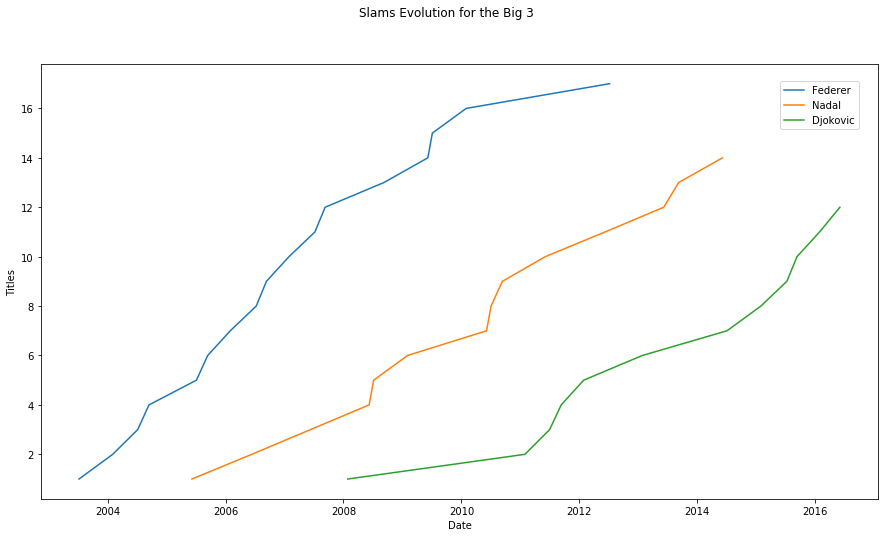

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.lineplot(x='Date', y='Titles', data=federer_slams)
sns.lineplot(x='Date', y='Titles', data=nadal_slams)
sns.lineplot(x='Date', y='Titles', data=djokovic_slams)
fig.legend(bbox_to_anchor=(-0.2, 0.8, 1., 0), labels=['Federer','Nadal','Djokovic'])
t=fig.suptitle('Slams Evolution for the Big 3')

In [ ]:
slams_winners = data[['Series', 'Round', 'WRank']]

In [ ]:
slams_winners = slams_winners[(slams_winners.Series == 'Grand Slam') & (slams_winners.Round == 'The Final')]

In [ ]:
slams_winners.WRank = slams_winners.WRank.astype(int)

In [ ]:
slams_winners

,Series,Round,WRank
281,Grand Slam,The Final,1
1415,Grand Slam,The Final,5
1690,Grand Slam,The Final,3
2395,Grand Slam,The Final,7
3244,Grand Slam,The Final,6
4409,Grand Slam,The Final,1
4684,Grand Slam,The Final,125
5389,Grand Slam,The Final,4
6207,Grand Slam,The Final,18
7294,Grand Slam,The Final,22


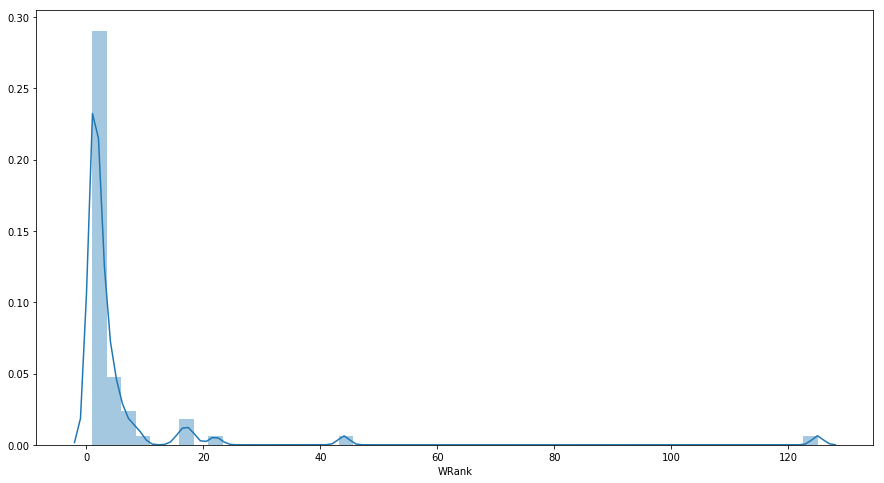

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.distplot(slams_winners.WRank)

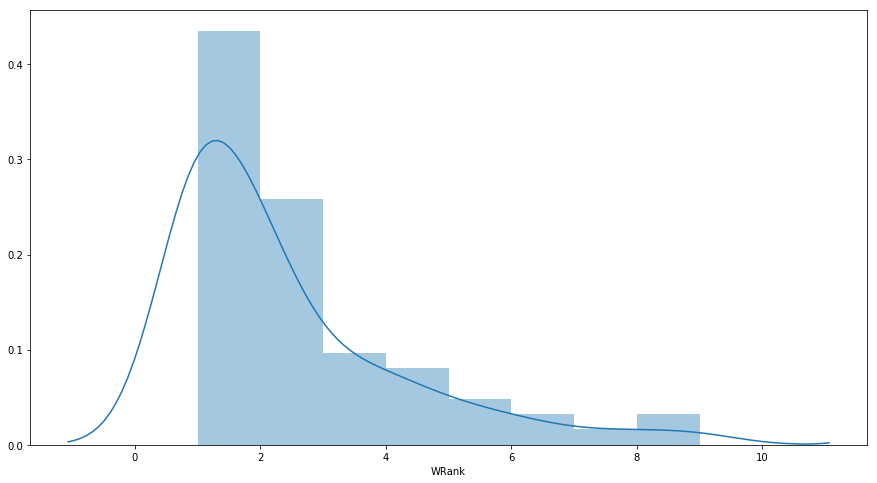

In [ ]:
# Very rare after the 20th place
fig = plt.figure(figsize=(15,8))
sns.distplot(slams_winners.WRank[slams_winners.WRank <=10])

In [ ]:
rank_prob_win = round(slams_winners.groupby('WRank')['Series'].count()/len(slams_winners),4)*100

In [ ]:
top3_prob_win = rank_prob_win[1] + rank_prob_win[2] + rank_prob_win[3]
print("You have %s%% chances to win a Grand Slam if you are in the top 3" %top3_prob_win)

You have 72.06% chances to win a Grand Slam if you are in the top 3


In [ ]:
num1 = data[['Winner', 'Loser', 'WRank', 'LRank']]
num1 = num1[(num1.WRank != 'NR') & (num1.LRank != 'NR')]
num1 = num1.dropna()
num1['WRank'] = num1['WRank'].astype(int)
num1['LRank'] = num1['LRank'].astype(int)
num1 = num1[(num1.WRank == 1) | (num1.LRank == 1)]

In [ ]:
num1_w = num1[num1.WRank == 1]['Winner']
num1_l = num1[num1.LRank == 1]['Loser']
num1_w.columns = ['Player']
num1_l.columns = ['Player']
num1 = pd.concat([num1_w, num1_l], sort=False)

num1 = num1.drop_duplicates()
print('Since 2000, there were %s Number 1 players' % num1.count())

Since 2000, there were 11 Number 1 players


In [ ]:
# Upset in Grand Slam

In [ ]:
slams = data[data.Series == 'Grand Slam']

In [ ]:
slams.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,CBW,CBL,GBW,GBL,IWW,IWL,SBW,SBL,B365W,B365L,B&WW,B&WL,EXW,EXL,PSW,PSL,WPts,LPts,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
155,6,Melbourne,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,1st Round,5,Agassi A.,Puerta M.,1,112,6.0,2.0,6.0,2.0,6.0,3.0,NaN,NaN,NaN,NaN,3.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,6,Melbourne,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,1st Round,5,Alami K.,Manta L.,35,107,6.0,4.0,7.0,6.0,7.0,5.0,NaN,NaN,NaN,NaN,3.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,6,Melbourne,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,1st Round,5,Arazi H.,Alonso J.,41,111,6.0,3.0,7.0,6.0,6.0,2.0,NaN,NaN,NaN,NaN,3.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,6,Melbourne,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,1st Round,5,Behrend T.,Meligeni F.,106,28,6.0,2.0,4.0,6.0,6.0,7.0,6.0,3.0,6.0,0.0,3.0,2.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,6,Melbourne,Australian Open,17/01/2000,Grand Slam,Outdoor,Hard,1st Round,5,Bjorkman J.,Stoltenberg J.,76,81,6.0,7.0,6.0,4.0,6.0,4.0,0.0,6.0,6.0,4.0,3.0,2.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
upset = slams[['Tournament', 'Series', 'Round', 'AvgW', 'AvgL']]

In [ ]:
upset = upset.dropna()

In [ ]:
upset.head()

,Tournament,Series,Round,AvgW,AvgL
29798,French Open,Grand Slam,1st Round,1.24,3.88
29799,French Open,Grand Slam,1st Round,1.06,8.62
29800,French Open,Grand Slam,1st Round,1.73,2.05
29801,French Open,Grand Slam,1st Round,1.04,9.83
29802,French Open,Grand Slam,1st Round,1.79,1.98


In [ ]:
round(upset.groupby('Tournament')['AvgW'].mean(),3)

Tournament
Australian Open    1.679
French Open        1.695
US Open            1.784
Wimbledon          1.787
Name: AvgW, dtype: float64

In [ ]:
round(upset.groupby('Round')['AvgW'].mean(),3)

Round
1st Round        1.750
2nd Round        1.724
3rd Round        1.742
4th Round        1.672
Quarterfinals    1.733
Semifinals       1.636
The Final        2.161
Name: AvgW, dtype: float64

In [ ]:
sets = slams[['Tournament', 'Series', 'Round', 'Wsets', 'Lsets']]
sets = sets.dropna()

In [ ]:
round(sets.groupby('Tournament')['Lsets'].mean(),3)

Tournament
Australian Open    0.685
French Open        0.663
US Open            0.679
Wimbledon          0.688
Name: Lsets, dtype: float64

In [ ]:
round(sets.groupby(['Round'])['Lsets'].mean(),3)

Round
1st Round        0.674
2nd Round        0.686
3rd Round        0.655
4th Round        0.691
Quarterfinals    0.705
Semifinals       0.750
The Final        0.776
Name: Lsets, dtype: float64

In [ ]:
wins = slams[['Tournament', 'Round', 'Winner']]
wins = wins[wins.Round == 'The Final']

In [ ]:
wins.head()

,Tournament,Round,Winner
281,Australian Open,The Final,Agassi A.
1415,French Open,The Final,Kuerten G.
1690,Wimbledon,The Final,Sampras P.
2395,US Open,The Final,Safin M.
3244,Australian Open,The Final,Agassi A.


In [ ]:
winners = wins.groupby('Winner')['Tournament'].count()

In [ ]:
winners = winners.reset_index()

In [ ]:
winners = winners.sort_values(['Tournament'], ascending=False)
winners

,Winner,Tournament
5,Federer R.,17
13,Nadal R.,14
4,Djokovic N.,12
0,Agassi A.,3
12,Murray A.,3
17,Wawrinka S.,3
8,Hewitt L.,2
11,Kuerten G.,2
15,Safin M.,2
16,Sampras P.,2


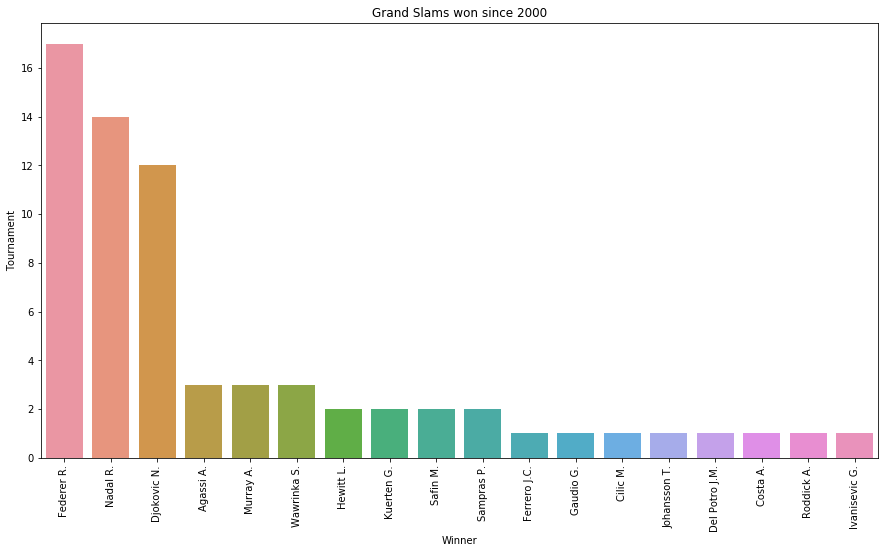

In [ ]:
plt.figure(figsize=(15,8))

g = sns.barplot(x=winners.Winner, y=winners.Tournament)
g.set_xticklabels(labels = winners.Winner,  rotation=90)
plt.title('Grand Slams won since 2000')
plt.show()

In [ ]:
winners_slam = wins.groupby(['Winner', 'Tournament']).count()
winners_slam = winners_slam.reset_index()
# winners_slam = winners_slam.sort_values(['Winner'], ascending=False)
winners_slam.columns = ['Winner','Tournament', 'Count']
winners_slam

,Winner,Tournament,Count
0,Agassi A.,Australian Open,3
1,Cilic M.,US Open,1
2,Costa A.,French Open,1
3,Del Potro J.M.,US Open,1
4,Djokovic N.,Australian Open,6
5,Djokovic N.,French Open,1
6,Djokovic N.,US Open,2
7,Djokovic N.,Wimbledon,3
8,Federer R.,Australian Open,4
9,Federer R.,French Open,1


In [ ]:
winners_slam = winners_slam.dropna()

<Figure size 1080x576 with 0 Axes>

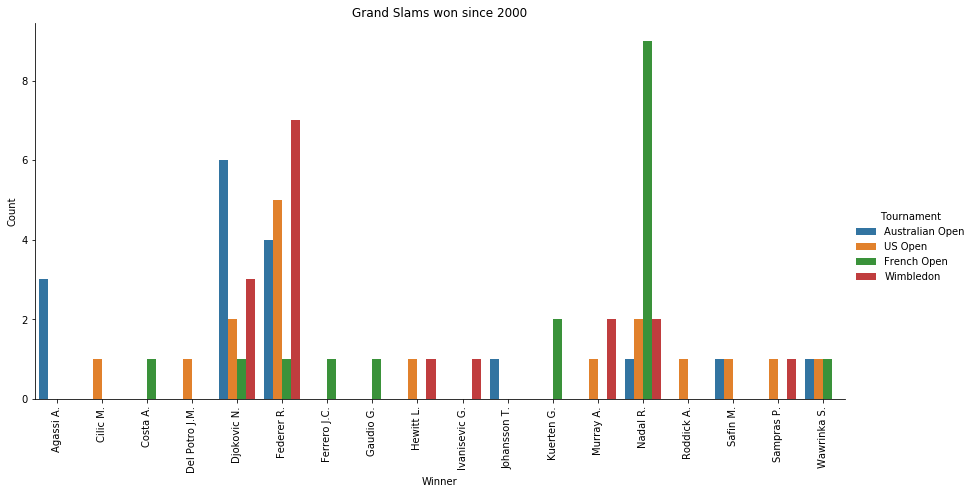

In [ ]:
fig = plt.figure(figsize=(15,8))

g = sns.catplot(x="Winner", y="Count", hue = "Tournament", data=winners_slam, kind="bar", size=6, aspect=2)
g.set_xticklabels(labels = winners_slam.Winner.unique(),  rotation=90)
plt.title('Grand Slams won since 2000')
plt.show()

In [ ]:
# Nadal loves on surface

In [ ]:
# Best players on surface

In [ ]:
surface = data[['Surface', 'Winner', 'Loser']]

In [ ]:
surface_w = surface[['Surface', 'Winner']]
surface_l = surface[['Surface', 'Loser']]
surface_w.columns = ['Surface', 'Player']
surface_l.columns = ['Surface', 'Player']

In [ ]:
surface_w['idx'] = range(1, len(surface_w) + 1)
surface_l['idx'] = range(1, len(surface_l) + 1)

In [ ]:
surface_w = surface_w.groupby(['Surface', 'Player']).count()
surface_w = surface_w.reset_index()
surface_w.columns = ['Surface', 'Player', 'Count_Win']

surface_l = surface_l.groupby(['Surface', 'Player']).count()
surface_l = surface_l.reset_index()
surface_l.columns = ['Surface', 'Player', 'Count_Lose']

In [ ]:
surface = pd.merge(surface_w, surface_l, on=['Surface', 'Player'])

In [ ]:
surface['total_play'] = surface['Count_Win'] + surface['Count_Lose']

In [ ]:
surface['perc_win'] = round(surface['Count_Win'] / surface['total_play'],4)*100

In [ ]:
surface = surface[surface.total_play > 50]

In [ ]:
surface.sort_values(by='perc_win', ascending=False).head(30)

,Surface,Player,Count_Win,Count_Lose,total_play,perc_win
612,Clay,Nadal R.,351,35,386,90.93
969,Grass,Federer R.,147,20,167,88.02
1435,Hard,Djokovic N.,469,82,551,85.12
1468,Hard,Federer R.,622,124,746,83.38
1129,Grass,Murray A.,90,18,108,83.33
944,Grass,Djokovic N.,65,14,79,82.28
351,Clay,Djokovic N.,169,39,208,81.25
1185,Grass,Roddick A.,82,21,103,79.61
1295,Hard,Agassi A.,203,56,259,78.38
1131,Grass,Nadal R.,58,17,75,77.33


In [ ]:
surface.Surface.unique()

array(['Carpet', 'Clay', 'Grass', 'Hard'], dtype=object)

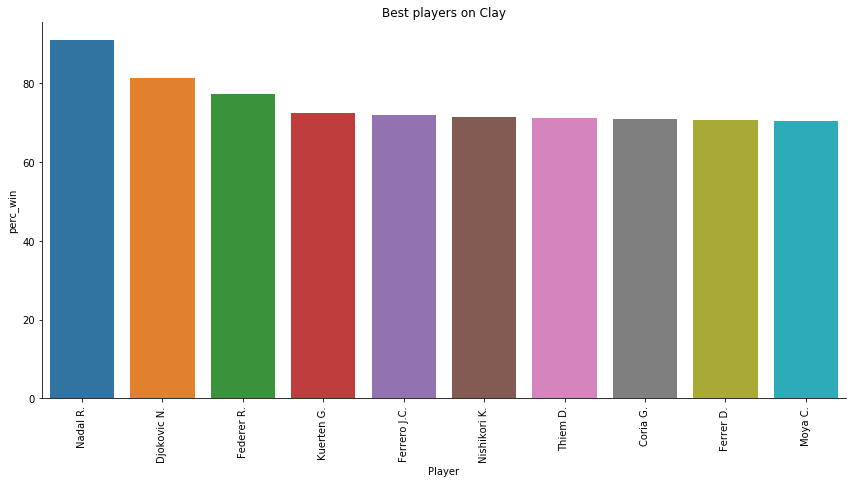

In [ ]:
top_Clay = surface[surface.Surface == 'Clay'].sort_values(by='perc_win', ascending = False).head(10)
g=sns.catplot(x='Player', y='perc_win', data=top_Clay, kind='bar', size=6, aspect=2)
t=g.set_xticklabels(labels = top_Clay.Player,  rotation=90)
title=plt.title('Best players on Clay')

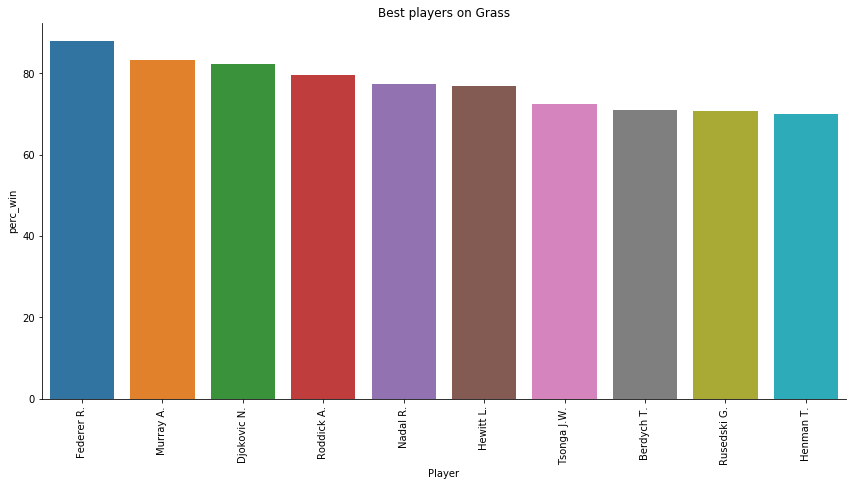

In [ ]:
# Best player on Grass

top_Grass = surface[surface.Surface == 'Grass'].sort_values(by='perc_win', ascending = False).head(10)
g=sns.catplot(x='Player', y='perc_win', data=top_Grass, kind='bar', size=6, aspect=2)
t=g.set_xticklabels(labels = top_Grass.Player,  rotation=90)
title=plt.title('Best players on Grass')

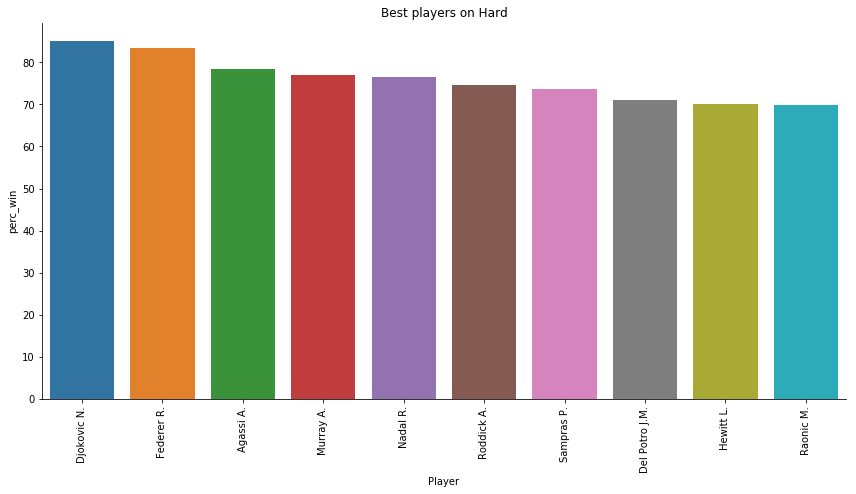

In [ ]:
top_Hard = surface[surface.Surface == 'Hard'].sort_values(by='perc_win', ascending = False).head(10)
g=sns.catplot(x='Player', y='perc_win', data=top_Hard, kind='bar', size=6, aspect=2)
g.set_xticklabels(labels = top_Hard.Player,  rotation=90)
title=plt.title('Best players on Hard')

In [ ]:
career = data[['Winner', 'Loser']]

career_w = data[['Winner']]
career_l = data[['Loser']]
career_w.columns = ['Player']
career_l.columns = ['Player']

career_w['idx'] = range(1, len(career_w) + 1)
career_l['idx'] = range(1, len(career_l) + 1)

career_w = career_w.groupby('Player').count()
career_w = career_w.reset_index()
career_w.columns = ['Player', 'Count_Win']

career_l = career_l.groupby('Player').count()
career_l = career_l.reset_index()
career_l.columns = ['Player', 'Count_Lose']

career = pd.merge(career_w, career_l, on='Player')

career['total_play'] = career['Count_Win'] + career['Count_Lose']
career['perc_win'] = round(career['Count_Win'] / career['total_play'],4)*100

career = career[career.total_play > 500]

career = career.sort_values(by='perc_win', ascending=False).head(20)
career

,Player,Count_Win,Count_Lose,total_play,perc_win
187,Djokovic N.,710,141,851,83.43
228,Federer R.,1018,218,1236,82.36
542,Nadal R.,779,171,950,82.00
540,Murray A.,566,174,740,76.49
649,Roddick A.,576,197,773,74.51
333,Hewitt L.,514,213,727,70.70
779,Tsonga J.W.,360,169,529,68.05
232,Ferrer D.,651,319,970,67.11
544,Nalbandian D.,357,184,541,65.99
61,Berdych T.,528,277,805,65.59


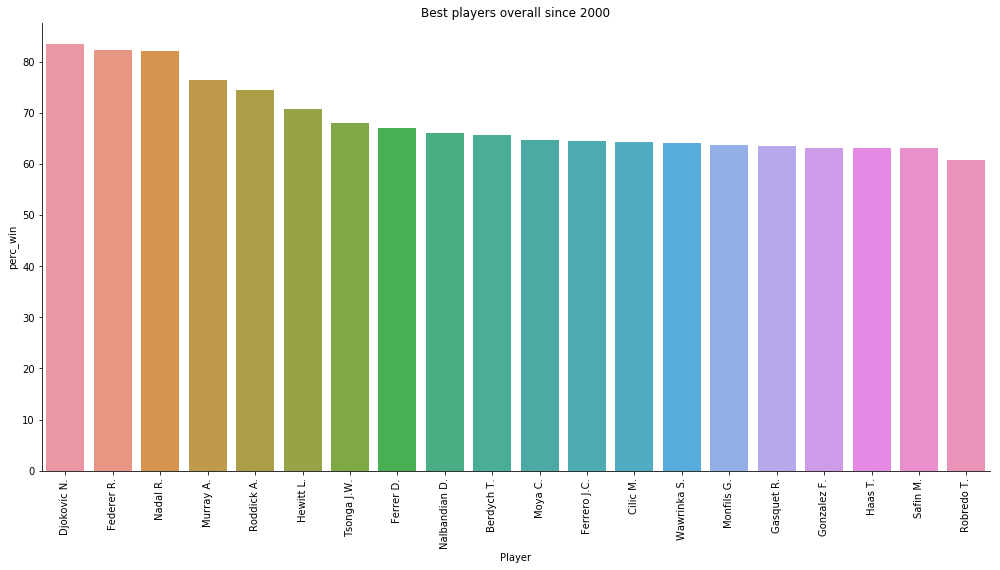

In [ ]:
g=sns.catplot(x='Player', y='perc_win', data=career, kind='bar', size=7, aspect=2)
g.set_xticklabels(labels = career.Player,  rotation=90)
title=plt.title('Best players overall since 2000')

# Big Three Comparison : Federer vs Nadal vs Djokovic

In [ ]:
surface_top3 = surface[(surface.Player.isin(['Federer R.', 'Nadal R.', 'Djokovic N.'])) & (surface.Surface != 'Carpet')]
surface_top3

,Surface,Player,Count_Win,Count_Lose,total_play,perc_win
351,Clay,Djokovic N.,169,39,208,81.25
381,Clay,Federer R.,203,60,263,77.19
612,Clay,Nadal R.,351,35,386,90.93
944,Grass,Djokovic N.,65,14,79,82.28
969,Grass,Federer R.,147,20,167,88.02
1131,Grass,Nadal R.,58,17,75,77.33
1435,Hard,Djokovic N.,469,82,551,85.12
1468,Hard,Federer R.,622,124,746,83.38
1719,Hard,Nadal R.,363,112,475,76.42


In [ ]:
surface_top3 = pd.pivot_table(surface_top3, values='perc_win', columns=['Surface'], index=['Player'])
surface_top3.index.names

FrozenList(['Player'])

In [ ]:
surface_top3[surface_top3.index == "Federer R."]

Surface,Clay,Grass,Hard
Player,,,
Federer R.,77.19,88.02,83.38


In [ ]:
%matplotlib inline

labels = np.array(['Clay', 'Grass', 'Hard'])
federer = surface_top3.loc[surface_top3[surface_top3.index == "Federer R."].index[0],labels].values

In [ ]:
federer = surface_top3.loc[surface_top3[surface_top3.index == "Federer R."].index[0],labels].values
nadal = surface_top3.loc[surface_top3[surface_top3.index == "Nadal R."].index[0],labels].values
djokovic = surface_top3.loc[surface_top3[surface_top3.index == "Djokovic N."].index[0],labels].values

In [ ]:
wins_top3 = pd.DataFrame([federer, nadal, djokovic])
wins_top3.columns = ['Clay', 'Grass', 'Hard']
wins_top3['Player'] = ['Federer R.', 'Nadal R.', 'Djokovic N.']
wins_top3 = wins_top3[['Player', 'Clay', 'Grass', 'Hard']]

In [ ]:
federer = np.concatenate((federer,[federer[0]]))
nadal = np.concatenate((nadal,[nadal[0]]))
djokovic = np.concatenate((djokovic,[djokovic[0]]))

In [ ]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))

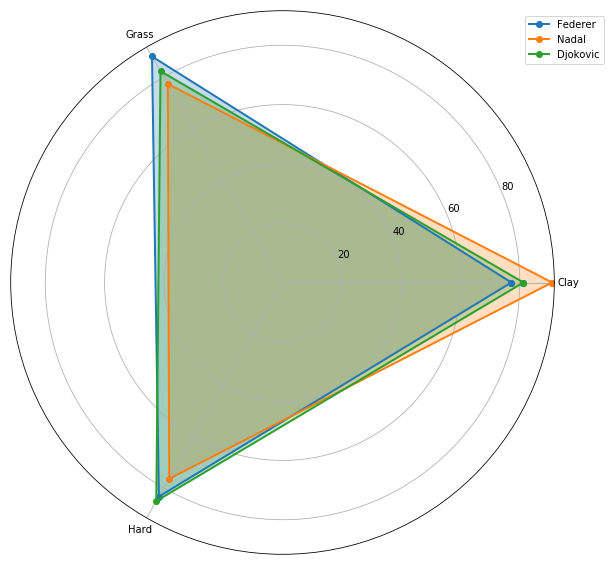

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, polar=True)
ax1.plot(angles, federer, 'o-', linewidth=2, label = 'Federer')
ax1.fill(angles, federer, alpha=0.25)
ax1.set_thetagrids(angles * 180/np.pi, labels)
ax1.grid(True)

ax2 = fig.add_subplot(111, polar=True)
ax2.plot(angles, nadal, 'o-', linewidth=2, label = 'Nadal')
ax2.fill(angles, nadal, alpha=0.25)
ax2.set_thetagrids(angles * 180/np.pi, labels)
ax2.grid(True)

ax3 = fig.add_subplot(111, polar=True)
ax3.plot(angles, djokovic, 'o-', linewidth=2, label = 'Djokovic')
ax3.fill(angles, djokovic, alpha=0.25)
ax3.set_thetagrids(angles * 180/np.pi, labels)
ax3.grid(True)

l=plt.legend(bbox_to_anchor=(1.1,1))

In [ ]:
wins_top3['mean_surface'] = wins_top3.iloc[:, 1:].sum(axis=1) /3

In [ ]:
wins_top3.sort_values(by='mean_surface', ascending=False)

,Player,Clay,Grass,Hard,mean_surface
2,Djokovic N.,81.25,82.28,85.12,82.883333
0,Federer R.,77.19,88.02,83.38,82.863333
1,Nadal R.,90.93,77.33,76.42,81.560000
